# Experiment Cluster Metrics

The 50 Pandas Dataframes below capture the following metrics for each of the 50 lattice machines in the cluster in the duration on the experiment:

- Timestamp
- CPU Usage: User Percent
- CPU Usage: System Percent
- Memory Total
- Memory Active
- Memory Inactive
- Network: eno1 Writes in KB/s
- Network: eno1 Reads in KB/s
- Network: eno2 Writes in KB/s
- Network: eno2 Reads in KB/s
- Disk Reads: sda
- Disk Reads: sdb
- Disk Reads: sdc
- Disk Reads: sdd
- Disk Writes: sda
- Disk Writes: sdb
- Disk Writes: sdc
- Disk Writes: sdd

In [50]:
# NOTEBOOK VARIABLES

experiment = "sequential"
cluster_metric = "MEM:active" # See dataframe for column titles

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [52]:
def hostname_to_ip(machine_name):
    parts = machine_name.split("-")
    if parts[0] == "lattice":
        number = int(parts[1])
        base = number + 10 # starts at lattice-100 : 129.82.208.110
        return "129.82.208." + str(base)
    else:
        print("Invalid hostname: ", machine_name)
        return None
        

In [53]:
dir_prefix = f"experiment_data/cluster_metrics/{experiment}"
machines_files = [(f"lattice-{i}", str(i-100)+"-"+hostname_to_ip(f"lattice-{i}")+".nmon.csv") for i in range(100, 150)]
machines_dfs = {}
for machine_entry in machines_files:
    machines_dfs[machine_entry[0]] = pd.read_csv(f"{dir_prefix}/{machine_entry[1]}", header=0)
    
machines_dfs["lattice-100"]

,timestamp,CPU_ALL:User%,CPU_ALL:Sys%,MEM:memtotal,MEM:active,MEM:inactive,NET:eno1-write-KB/s,NET:eno1-read-KB/s,NET:eno2-write-KB/s,NET:eno2-read-KB/s,DISKREAD:sda,DISKREAD:sdb,DISKREAD:sdc,DISKREAD:sdd,DISKWRITE:sda,DISKWRITE:sdb,DISKWRITE:sdc,DISKWRITE:sdd
0,1621194245,5.3,4.6,31828.8,13531.9,6895.7,97.2,69.3,0.0,0.0,11.2,0.0,0.0,0.0,347.6,0.0,0.0,0.0
1,1621194246,2.6,1.9,31828.8,13540.6,6895.7,32.7,34.7,0.0,0.0,0.0,0.0,0.0,0.0,295.3,0.0,0.0,0.0
2,1621194247,1.9,1.9,31828.8,13541.7,6895.8,83.5,32.9,0.0,0.0,0.0,0.0,0.0,0.0,223.3,0.0,0.0,0.0
3,1621194248,2.9,2.7,31828.8,13541.7,6895.8,376.0,61.2,0.0,0.0,0.0,0.0,0.0,0.0,59.9,0.0,0.0,0.0
4,1621194249,1.6,2.0,31828.8,13541.7,6895.8,420.6,38.3,0.0,0.0,0.0,0.0,0.0,0.0,331.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401,1621205843,1.9,1.6,31828.8,13539.5,6925.3,75.7,12.4,0.0,0.0,0.0,0.0,0.0,0.0,231.5,0.0,0.0,0.0
11402,1621205844,1.8,2.2,31828.8,13539.5,6925.3,428.9,24.7,0.0,0.0,0.0,0.0,0.0,0.0,303.4,0.0,0.0,0.0
11403,1621205845,2.7,2.7,31828.8,13539.5,6925.3,15.2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,203.6,0.0,0.0,0.0
11404,1621205846,2.8,2.2,31828.8,13539.8,6925.4,84.9,33.7,0.0,0.0,0.0,0.0,0.0,0.0,251.5,0.0,0.0,0.0


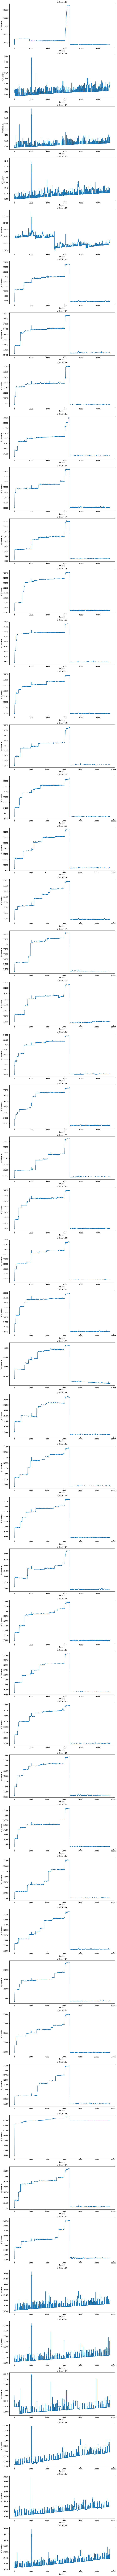

In [54]:
# ---- NMON Profiling ----

# Create a figure
figure, axis = plt.subplots(len(machines_dfs), 1, figsize=(12,300))

for i, hostname in enumerate(machines_dfs.keys()):
    df = machines_dfs[hostname]
    data_list = df[cluster_metric].to_list()
    axis[i].plot(data_list)
    axis[i].set_xlabel("Seconds")
    axis[i].set_ylabel(cluster_metric)
    axis[i].set_title(hostname)


# show plot
plt.show()